# What are the factors that *drive* car sales?

I assume the role of an analyst at Crankshaft List, where hundreds of free advertisements for vehicles are put on display daily. We will study the data from several years ago and determine the factors that affect the price of a vehicle.

The dataset contains the following columns: 
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — vehicle's mileage when the listing was posted  
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has four-wheel drive
- `date_posted` — date of listing
- `days_listed` — listing airtime, how long a listing lasted before being taken down 


Goal: **determining the factors that influence the price of a vehicle.**

Problems statement:
1. How are the following variables distributed within the vehicle advertisements?
    1. Price
    1. Vehicle age when the ad was posted
    1. Mileage
    1. Number of cylinders
    1. Condition
1. What is the distribution of ads' airtime? 
1. Which vehicle type is listed the most?
1. What are the factors that affect car sales?

Hypotheses:
1. Vehicle price correlates negatively with vehicle age since used vehicles often come in worse conditions than new ones. <br> This hypothesis will not apply to extremely old/antique vehicles since antique items have their own selling point.
1. Vehicle price correlates negatively with mileage since used cars fetch lower prices.
1. Vehicle prices correlates positively with the number of cylinders because vehicles with a high number cylinders are usually of high performance, such as sports cars.
1. Vehicle price depends on condition: the better the condition, the higher the price.
1. Vehicle price is negatively correlated with the listing's airtime because people will lower prices if their product doesn't sell.

## Data preprocessing

### Loading libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = 'last'

### Loading data

In [5]:
data = pd.read_csv('dataset_vehicles_us.csv')

### Preliminary data exploration

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [7]:
data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [8]:
# Checking for duplicates
data.duplicated().sum()

0

In [9]:
# Checking for impossible values
print('price')
print(data['price'].max())
print(data['price'].min())
print()

print('model_year')
print(data['model_year'].max())
print(data['model_year'].min())
print()

print('model')
print(data['model'].unique())
print()

print('condition')
print(data['condition'].unique())
print()

print('cylinders')
print(data['cylinders'].unique())
print()

print('fuel')
print(data['fuel'].unique())
print()

print('odometer')
print(data['odometer'].max())
print(data['odometer'].min())
print()

print('transmission')
print(data['transmission'].unique())
print()

print('type')
print(data['type'].unique())
print()

print('paint_color')
print(data['paint_color'].unique())
print()

print('is_4wd')
print(data['is_4wd'].unique())
print()

print('date_posted')
print(pd.to_datetime(data['date_posted']).max())
print(pd.to_datetime(data['date_posted']).min())
print()

print('days_listed')
print(data['days_listed'].max())
print(data['days_listed'].min())
print()

price
375000
1

model_year
2019.0
1908.0

model
['bmw x5' 'ford f-150' 'hyundai sonata' 'chrysler 200' 'chrysler 300'
 'toyota camry' 'honda pilot' 'kia sorento' 'chevrolet silverado 1500'
 'honda accord' 'ram 1500' 'gmc yukon' 'jeep cherokee'
 'chevrolet traverse' 'hyundai elantra' 'chevrolet tahoe' 'toyota rav4'
 'chevrolet silverado' 'jeep wrangler' 'chevrolet malibu' 'ford fusion se'
 'chevrolet impala' 'chevrolet corvette' 'jeep liberty' 'toyota camry le'
 'nissan altima' 'subaru outback' 'toyota highlander' 'dodge charger'
 'toyota tacoma' 'chevrolet equinox' 'nissan rogue'
 'mercedes-benz benze sprinter 2500' 'honda cr-v' 'jeep grand cherokee'
 'toyota 4runner' 'ford focus' 'honda civic' 'kia soul'
 'chevrolet colorado' 'ford f150 supercrew cab xlt'
 'chevrolet camaro lt coupe 2d' 'chevrolet cruze' 'ford mustang'
 'chevrolet silverado 3500hd' 'nissan frontier crew cab sv'
 'subaru impreza' 'jeep grand cherokee laredo' 'nissan versa'
 'ford f-250 sd' 'chevrolet silverado 1500 cre

There are 51,525 rows across 13 columns. <br>
Some columns do not have the proper data type:
- `model_year` (should be `int64`)
- `cylinders` (should be `int64`)
- `is_4wd` (should be `int64`)
- `date_posted` (string `object`, should be `datetime`)

Some columns related to vehicle specifications have missing values:
- `model_year`
- `cylinders`
- `odometer`
- `paint_color`
- `is_4wd`, containing the most missing values.

`price` contains very low values, which should be impossible for a vehicle. <br>
`model` contains implicit duplicates.

The data need to be cleaned before conducting further analyses:
- implicit duplicates need to be eliminated,
- missing values need to be filled,
- incorrect data types need to be converted.

## Data cleaning

### Merging duplicates in `model`

Implicit duplicates in `model` can be merged to simplify analyses.

In [10]:
# Grouping data
model_list = data['model'].unique()
model_list.sort()
model_list = model_list.tolist()
model_list

['acura tl',
 'bmw x5',
 'buick enclave',
 'cadillac escalade',
 'chevrolet camaro',
 'chevrolet camaro lt coupe 2d',
 'chevrolet colorado',
 'chevrolet corvette',
 'chevrolet cruze',
 'chevrolet equinox',
 'chevrolet impala',
 'chevrolet malibu',
 'chevrolet silverado',
 'chevrolet silverado 1500',
 'chevrolet silverado 1500 crew',
 'chevrolet silverado 2500hd',
 'chevrolet silverado 3500hd',
 'chevrolet suburban',
 'chevrolet tahoe',
 'chevrolet trailblazer',
 'chevrolet traverse',
 'chrysler 200',
 'chrysler 300',
 'chrysler town & country',
 'dodge charger',
 'dodge dakota',
 'dodge grand caravan',
 'ford econoline',
 'ford edge',
 'ford escape',
 'ford expedition',
 'ford explorer',
 'ford f-150',
 'ford f-250',
 'ford f-250 sd',
 'ford f-250 super duty',
 'ford f-350 sd',
 'ford f150',
 'ford f150 supercrew cab xlt',
 'ford f250',
 'ford f250 super duty',
 'ford f350',
 'ford f350 super duty',
 'ford focus',
 'ford focus se',
 'ford fusion',
 'ford fusion se',
 'ford mustang',
 '

The duplicates seen in the above array are:
1. `ford f-150` and `ford f150`
1. `ford f-250` and `ford f250`

The values will be merged as `ford f-150` and `ford f-250`, in accordance to their official names.

In [11]:
# Merging duplicates
data['model'].replace(to_replace='ford f150', value='ford f-150', inplace=True) 
print(data[data['model'] == 'ford f150']['model'].count())

data['model'].replace(to_replace='ford f250', value='ford f-250', inplace=True) 
print(data[data['model'] == 'ford f250']['model'].count())

0
0


The `SUV` category in `type` can be converted to lower case letters.

In [12]:
data['type'].replace(to_replace='SUV', value='suv', inplace=True)
data['type'].unique()

array(['suv', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

### Encoding categorical values in `condition`

The categorical values describing vehicle condition in `condition` can be encoded numerically to simplify data analysis.
They will be coded as such:
- new = 5
- like new = 4
- excellent = 3
- good = 2
- fair = 1
- salvage = 0

In [13]:
# Defining a function to encode the categorical values

def encode_condition(value):
    """
    This function takes a value and encodes it numerically 
    according to the rules stated above:
    5 = new
    4 = like new
    3 = excellent
    2 = good
    1 = fair
    0 = salvage
    """
    if value == 'new':
        return 5
    elif value == 'like new':
        return 4
    elif value == 'excellent':
        return 3
    elif value == 'good':
        return 2
    elif value == 'fair':
        return 1
    elif value == 'salvage':
        return 0
    else:
        return -1
    
# Applying the function to `condition` and storing it in a new column
data['condition_numeric'] = data['condition'].apply(encode_condition)

# Checking the data
data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_numeric
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,NaN,1.0,2018-06-23,19,2
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,4
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,1
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37,4
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22,0
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32,3
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71,2


## Handling missing values

### `price`

The column has impossible values: prices that are too low for vehicles. This is possibily caused by users not entering the whole price (e.g. inputting `10` to represent the actual price of `10000`) or users not wanting to specify their price (as exemplified by `1`).

These values cannot be replaced because `price` is a variable we will analyze: replacing these values will distort the results. To avoid incorrect results, we will exclude them from further analyses.

### `model_year`

In [14]:
# Checking the number of missing values in `model_year`
print(data['model_year'].isna().sum())
print(data['model_year'].isna().sum() / len(data))

3619
0.07023774866569626


`NaN` values in `model_year` may be due to users not knowing the production year of their vehicles. These values will be replaced by the model median.

In [15]:
# Defining the function to fill missing values by model median
def fill_missing_value_median(dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

In [16]:
fill_missing_value_median(data, 'model', 'model_year')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              51525 non-null  int64  
 1   model_year         51525 non-null  float64
 2   model              51525 non-null  object 
 3   condition          51525 non-null  object 
 4   cylinders          46265 non-null  float64
 5   fuel               51525 non-null  object 
 6   odometer           43633 non-null  float64
 7   transmission       51525 non-null  object 
 8   type               51525 non-null  object 
 9   paint_color        42258 non-null  object 
 10  is_4wd             25572 non-null  float64
 11  date_posted        51525 non-null  object 
 12  days_listed        51525 non-null  int64  
 13  condition_numeric  51525 non-null  int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 5.5+ MB


### `cylinders`

In [17]:
# Checking the number of missing values in `cylinders`
print(data['cylinders'].isna().sum())
print(data['cylinders'].isna().sum() / len(data))

5260
0.10208636584182436


The missing values in this column will be given the same treatment as before: filled with their model median values.

In [18]:
fill_missing_value_median(data, 'model', 'cylinders')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              51525 non-null  int64  
 1   model_year         51525 non-null  float64
 2   model              51525 non-null  object 
 3   condition          51525 non-null  object 
 4   cylinders          51525 non-null  float64
 5   fuel               51525 non-null  object 
 6   odometer           43633 non-null  float64
 7   transmission       51525 non-null  object 
 8   type               51525 non-null  object 
 9   paint_color        42258 non-null  object 
 10  is_4wd             25572 non-null  float64
 11  date_posted        51525 non-null  object 
 12  days_listed        51525 non-null  int64  
 13  condition_numeric  51525 non-null  int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 5.5+ MB


### `odometer`

In [19]:
# Checking the number of missing values in `odometer`
print(data['odometer'].isna().sum())
print(data['odometer'].isna().sum() / len(data))

7892
0.15316836487142163


Presence of missing values in `odometer` may be caused by users simply not inputting the vehicles' mileage.

Since the mileage in `odometer` is numerical (not categorical) and the value `0.0` already exists, the missing values will be filled with a placeholder value of `-1`.

In [20]:
fill_missing_value_median(data, 'model', 'odometer')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              51525 non-null  int64  
 1   model_year         51525 non-null  float64
 2   model              51525 non-null  object 
 3   condition          51525 non-null  object 
 4   cylinders          51525 non-null  float64
 5   fuel               51525 non-null  object 
 6   odometer           51484 non-null  float64
 7   transmission       51525 non-null  object 
 8   type               51525 non-null  object 
 9   paint_color        42258 non-null  object 
 10  is_4wd             25572 non-null  float64
 11  date_posted        51525 non-null  object 
 12  days_listed        51525 non-null  int64  
 13  condition_numeric  51525 non-null  int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 5.5+ MB


41 rows still remain after the execution of the `fill_missing_value` function. Further inspection upon these rows reveal the following results:

In [21]:
data[data['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_numeric
42,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2019-01-15,16,3
1642,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2018-12-04,36,3
2232,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2018-08-23,70,3
2731,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2019-04-12,31,3
4149,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2018-10-12,28,3
4681,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,NaN,NaN,2018-10-02,32,3
5681,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2018-12-11,34,3
8975,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,NaN,NaN,2018-09-24,45,3
10600,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2018-09-16,47,3
11541,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,NaN,NaN,2018-05-28,24,3


In [22]:
print(data.loc[data['model'] == 'mercedes-benz benze sprinter 2500', 'odometer'].unique())
print(data.loc[data['model'] == 'mercedes-benz benze sprinter 2500', 'price'].unique())
print(data.loc[data['model'] == 'mercedes-benz benze sprinter 2500', 'condition'].unique())
data.loc[data['model'] == 'mercedes-benz benze sprinter 2500', 'model'].count()

[nan]
[34900]
['excellent']


41

The function could not determine the median milage of the `mercedes-benz benze sprinter 250` model since every entry of the said model has `NaN` in `odometer`. Furthermore, the values of these entries are highly similar to each other. It is likely that the 41 rows are actually duplicates of one listing, posted multiple times. Because we cannot fill the important variable, `odometer`, all of these rows will be removed in later steps.

### `paint_color`

In [23]:
# Checking the number of missing values in `paint_color`
print(data['paint_color'].isna().sum())
print(data['paint_color'].isna().sum() / len(data))

9267
0.17985443959243086


Some values in `paint_color` may be missing due to the field being optional and users not filling it. It may also be caused by actual problems in color, such as the car having color-changing paint or covered in decals that obscure the actual color.

To preserve the `object` data type in `paint_color`, a placeholder value `unknown` will replace the missing values.

In [24]:
# Filling the missing values in `paint_color`
data['paint_color'].fillna('unknown', inplace=True)

# Checking the data
print(data['paint_color'].isna().sum())

0


### `is_4wd`

In [25]:
# Mengecek jumlah nilai yang hilang dalam kolom `is_4wd`
# Checking the number of missing values in `is_4wd`
print(data['is_4wd'].isna().sum())
print(data['is_4wd'].isna().sum() / len(data))

25953
0.5036972343522562


Calling `.unique()` on this column shows that there are only two values: `1.0` and `nan`. Thus, it can be concluded that the missing values in `is_4wd` can be assumed to be `0.0`, the other possible value of `bool` data.

The `NaN` values here might have been caused by an error in data acquisition, causing the boolean `0` to be recorded as null values.

In [26]:
# Filling the missing values in `odometer`
data['is_4wd'].fillna(0, inplace=True)

# Checking the data
print(data['is_4wd'].isna().sum())

0


### Summary of changes

In [27]:
# Checking the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              51525 non-null  int64  
 1   model_year         51525 non-null  float64
 2   model              51525 non-null  object 
 3   condition          51525 non-null  object 
 4   cylinders          51525 non-null  float64
 5   fuel               51525 non-null  object 
 6   odometer           51484 non-null  float64
 7   transmission       51525 non-null  object 
 8   type               51525 non-null  object 
 9   paint_color        51525 non-null  object 
 10  is_4wd             51525 non-null  float64
 11  date_posted        51525 non-null  object 
 12  days_listed        51525 non-null  int64  
 13  condition_numeric  51525 non-null  int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 5.5+ MB


The null values in the data were replaced by the following:
- model median the columns `model_year` and `cylinders`,
- model median in the column `odometer`, except for 41 rows of model `mercedes-benz benze sprinter 2500` which will be excluded,
- placeholder value of `unknown` in the column `paint_color`,
- boolean value of `0` in the column `is_4wd`.

No changes were made to the impossible values in `price`.

As shown above, only the specified 41 `NaN` values remain in the data.

## Changing data types

The following columns will be given their proper data types:
- `model_year`, `cylinders` (`float64` to `int64`),
- `date_posted` (`object` to `datetime`).
- `is_4wd` (`float64` to `bool`).

In [28]:
data['model_year'] = data['model_year'].astype('int')
data['cylinders'] = data['cylinders'].astype('int')
data['is_4wd'] = data['is_4wd'].astype('bool')
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')

# Checking changes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              51525 non-null  int64         
 1   model_year         51525 non-null  int32         
 2   model              51525 non-null  object        
 3   condition          51525 non-null  object        
 4   cylinders          51525 non-null  int32         
 5   fuel               51525 non-null  object        
 6   odometer           51484 non-null  float64       
 7   transmission       51525 non-null  object        
 8   type               51525 non-null  object        
 9   paint_color        51525 non-null  object        
 10  is_4wd             51525 non-null  bool          
 11  date_posted        51525 non-null  datetime64[ns]
 12  days_listed        51525 non-null  int64         
 13  condition_numeric  51525 non-null  int64         
dtypes: boo

## Improving data quality

Additional factors need to be added to the data to ease further analyses.

### Separating days, months, and years from `date_posted`

#### Days of the week

In [29]:
data['weekday'] = data['date_posted'].dt.day_name()
data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_numeric,weekday
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,suv,unknown,True,2018-06-23,19,2,Saturday
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2,Friday
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,4,Thursday
3,1500,2003,ford f-150,fair,8,gas,121928.0,automatic,pickup,unknown,False,2019-03-22,9,1,Friday
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,3,Tuesday


#### Months

In [30]:
data['month'] = data['date_posted'].dt.month_name()
data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_numeric,weekday,month
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,suv,unknown,True,2018-06-23,19,2,Saturday,June
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2,Friday,October
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,4,Thursday,February
3,1500,2003,ford f-150,fair,8,gas,121928.0,automatic,pickup,unknown,False,2019-03-22,9,1,Friday,March
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,3,Tuesday,April


#### Years

In [31]:
data['year'] = data['date_posted'].dt.year
data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_numeric,weekday,month,year
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,suv,unknown,True,2018-06-23,19,2,Saturday,June,2018
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2,Friday,October,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,4,Thursday,February,2019
3,1500,2003,ford f-150,fair,8,gas,121928.0,automatic,pickup,unknown,False,2019-03-22,9,1,Friday,March,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,3,Tuesday,April,2019


### Adding vehicle age

Vehicle's age (per the time of the ad's publication) will be calculated by subtracting `model_year` from `year`.

In [32]:
data['age'] = data['year'] - data['model_year']
data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_numeric,weekday,month,year,age
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,suv,unknown,True,2018-06-23,19,2,Saturday,June,2018,7
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2,Friday,October,2018,7
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,4,Thursday,February,2019,6
3,1500,2003,ford f-150,fair,8,gas,121928.0,automatic,pickup,unknown,False,2019-03-22,9,1,Friday,March,2019,16
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,3,Tuesday,April,2019,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,4,Wednesday,October,2018,5
51521,2700,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,0,Wednesday,November,2018,16
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,3,Thursday,November,2018,9
51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,2,Monday,July,2018,5


### Calculating mean annual mileage

Annual mileage will be calculated by dividing `odometer` by `age`, except that vehicles with missing `model_year` or `odometer` will not be included and will be given `1` as a placeholder value.

In [33]:
data['age'].replace(0, 1, inplace=True)
data['mean_annual_mileage'] = data['odometer'] / data['age']

In [34]:
data.describe()

,price,model_year,cylinders,odometer,days_listed,condition_numeric,year,age,mean_annual_mileage
count,51525.000000,51525.000000,51525.000000,51484.000000,51525.00000,51525.000000,51525.000000,51525.000000,51484.000000
mean,12132.464920,2009.793770,6.121067,115331.207589,39.55476,2.637535,2018.307462,8.555459,18910.912842
std,10040.803015,6.099575,1.657457,60633.075402,28.20427,0.712447,0.461447,6.058036,16423.034000
min,1.000000,1908.000000,3.000000,0.000000,0.00000,0.000000,2018.000000,1.000000,0.000000
25%,5000.000000,2007.000000,4.000000,77000.000000,19.00000,2.000000,2018.000000,4.000000,10473.800000
50%,9000.000000,2011.000000,6.000000,115376.000000,33.00000,3.000000,2018.000000,7.000000,15026.550000
75%,16839.000000,2014.000000,8.000000,148346.000000,53.00000,3.000000,2019.000000,12.000000,21833.333333
max,375000.000000,2019.000000,12.000000,990000.000000,271.00000,5.000000,2019.000000,110.000000,373200.000000


## Summary of data to be excluded
As some of the values in the data are mere placeholders, the following items should be excluded from analyses:
1. `0` in the columns `model_year` and `cylinders`,
1. `-1` in the column `odometer` and `mean_annual_mileage`,
1. vehicles of `age >= 1908` (`1908` being the lowest `model_year` value) and their corresponding values in `mean_annual_mileage`,
1. the 41 rows with the model `mercedes-benz benze sprinter 2500`.

## Checking cleaned data

To ensure that the data have been thoroughly cleaned, we will inspect the general information on the dataset before proceeding to the analyses.

In [35]:
# tampilkan informasi/rangkuman umum tentang DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   price                51525 non-null  int64         
 1   model_year           51525 non-null  int32         
 2   model                51525 non-null  object        
 3   condition            51525 non-null  object        
 4   cylinders            51525 non-null  int32         
 5   fuel                 51525 non-null  object        
 6   odometer             51484 non-null  float64       
 7   transmission         51525 non-null  object        
 8   type                 51525 non-null  object        
 9   paint_color          51525 non-null  object        
 10  is_4wd               51525 non-null  bool          
 11  date_posted          51525 non-null  datetime64[ns]
 12  days_listed          51525 non-null  int64         
 13  condition_numeric    51525 non-

In [36]:
boolean = data['mean_annual_mileage'].isna()
data[boolean]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_numeric,weekday,month,year,age,mean_annual_mileage
42,34900,2013,mercedes-benz benze sprinter 2500,excellent,6,diesel,NaN,automatic,van,black,False,2019-01-15,16,3,Tuesday,January,2019,6,NaN
1642,34900,2013,mercedes-benz benze sprinter 2500,excellent,6,diesel,NaN,automatic,van,black,False,2018-12-04,36,3,Tuesday,December,2018,5,NaN
2232,34900,2013,mercedes-benz benze sprinter 2500,excellent,6,diesel,NaN,automatic,van,black,False,2018-08-23,70,3,Thursday,August,2018,5,NaN
2731,34900,2013,mercedes-benz benze sprinter 2500,excellent,6,diesel,NaN,automatic,van,black,False,2019-04-12,31,3,Friday,April,2019,6,NaN
4149,34900,2013,mercedes-benz benze sprinter 2500,excellent,6,diesel,NaN,automatic,van,black,False,2018-10-12,28,3,Friday,October,2018,5,NaN
4681,34900,2013,mercedes-benz benze sprinter 2500,excellent,6,diesel,NaN,automatic,van,unknown,False,2018-10-02,32,3,Tuesday,October,2018,5,NaN
5681,34900,2013,mercedes-benz benze sprinter 2500,excellent,6,diesel,NaN,automatic,van,black,False,2018-12-11,34,3,Tuesday,December,2018,5,NaN
8975,34900,2013,mercedes-benz benze sprinter 2500,excellent,6,diesel,NaN,automatic,van,unknown,False,2018-09-24,45,3,Monday,September,2018,5,NaN
10600,34900,2013,mercedes-benz benze sprinter 2500,excellent,6,diesel,NaN,automatic,van,black,False,2018-09-16,47,3,Sunday,September,2018,5,NaN
11541,34900,2013,mercedes-benz benze sprinter 2500,excellent,6,diesel,NaN,automatic,van,unknown,False,2018-05-28,24,3,Monday,May,2018,5,NaN


All columns no longer have missing values except for `mean_annual_mileage` which has 2 null values. Further inspection shows that the rows in question have `0` in column `age`, generating an undefined value (represented by `NaN`) through the calculations for `mean_annual_mileage`. These values will be filled with `0`.

In [37]:
data.loc[boolean, 'mean_annual_mileage'] = 0
data[boolean]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_numeric,weekday,month,year,age,mean_annual_mileage
42,34900,2013,mercedes-benz benze sprinter 2500,excellent,6,diesel,NaN,automatic,van,black,False,2019-01-15,16,3,Tuesday,January,2019,6,0.0
1642,34900,2013,mercedes-benz benze sprinter 2500,excellent,6,diesel,NaN,automatic,van,black,False,2018-12-04,36,3,Tuesday,December,2018,5,0.0
2232,34900,2013,mercedes-benz benze sprinter 2500,excellent,6,diesel,NaN,automatic,van,black,False,2018-08-23,70,3,Thursday,August,2018,5,0.0
2731,34900,2013,mercedes-benz benze sprinter 2500,excellent,6,diesel,NaN,automatic,van,black,False,2019-04-12,31,3,Friday,April,2019,6,0.0
4149,34900,2013,mercedes-benz benze sprinter 2500,excellent,6,diesel,NaN,automatic,van,black,False,2018-10-12,28,3,Friday,October,2018,5,0.0
4681,34900,2013,mercedes-benz benze sprinter 2500,excellent,6,diesel,NaN,automatic,van,unknown,False,2018-10-02,32,3,Tuesday,October,2018,5,0.0
5681,34900,2013,mercedes-benz benze sprinter 2500,excellent,6,diesel,NaN,automatic,van,black,False,2018-12-11,34,3,Tuesday,December,2018,5,0.0
8975,34900,2013,mercedes-benz benze sprinter 2500,excellent,6,diesel,NaN,automatic,van,unknown,False,2018-09-24,45,3,Monday,September,2018,5,0.0
10600,34900,2013,mercedes-benz benze sprinter 2500,excellent,6,diesel,NaN,automatic,van,black,False,2018-09-16,47,3,Sunday,September,2018,5,0.0
11541,34900,2013,mercedes-benz benze sprinter 2500,excellent,6,diesel,NaN,automatic,van,unknown,False,2018-05-28,24,3,Monday,May,2018,5,0.0


In [38]:
# Checking the data once more
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   price                51525 non-null  int64         
 1   model_year           51525 non-null  int32         
 2   model                51525 non-null  object        
 3   condition            51525 non-null  object        
 4   cylinders            51525 non-null  int32         
 5   fuel                 51525 non-null  object        
 6   odometer             51484 non-null  float64       
 7   transmission         51525 non-null  object        
 8   type                 51525 non-null  object        
 9   paint_color          51525 non-null  object        
 10  is_4wd               51525 non-null  bool          
 11  date_posted          51525 non-null  datetime64[ns]
 12  days_listed          51525 non-null  int64         
 13  condition_numeric    51525 non-

In [39]:
# Showing samples
data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_numeric,weekday,month,year,age,mean_annual_mileage
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,suv,unknown,True,2018-06-23,19,2,Saturday,June,2018,7,20714.285714
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2,Friday,October,2018,7,12672.142857
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,4,Thursday,February,2019,6,18333.333333
3,1500,2003,ford f-150,fair,8,gas,121928.0,automatic,pickup,unknown,False,2019-03-22,9,1,Friday,March,2019,16,7620.500000
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,3,Tuesday,April,2019,2,40451.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,4,Wednesday,October,2018,5,17627.200000
51521,2700,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,0,Wednesday,November,2018,16,11343.750000
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,3,Thursday,November,2018,9,14222.222222
51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,2,Monday,July,2018,5,27914.600000


## Studying the core parameters

Next, we will study the following core parameters through plots and `.describe()`:
- `price`
- `age`
- `odometer`
- `cylinders`
- `condition_numeric`


In [40]:
# Tabulating the statistics of the core parameters
core_parameters = ['price', 'age', 'odometer', 'cylinders', 'condition_numeric']
series_list = []

for parameter in core_parameters:
    series = data[parameter].describe()
    series_list.append(series)
    
pd.DataFrame(data=series_list).transpose()

,price,age,odometer,cylinders,condition_numeric
count,51525.000000,51525.000000,51484.000000,51525.000000,51525.000000
mean,12132.464920,8.555459,115331.207589,6.121067,2.637535
std,10040.803015,6.058036,60633.075402,1.657457,0.712447
min,1.000000,1.000000,0.000000,3.000000,0.000000
25%,5000.000000,4.000000,77000.000000,4.000000,2.000000
50%,9000.000000,7.000000,115376.000000,6.000000,3.000000
75%,16839.000000,12.000000,148346.000000,8.000000,3.000000
max,375000.000000,110.000000,990000.000000,12.000000,5.000000


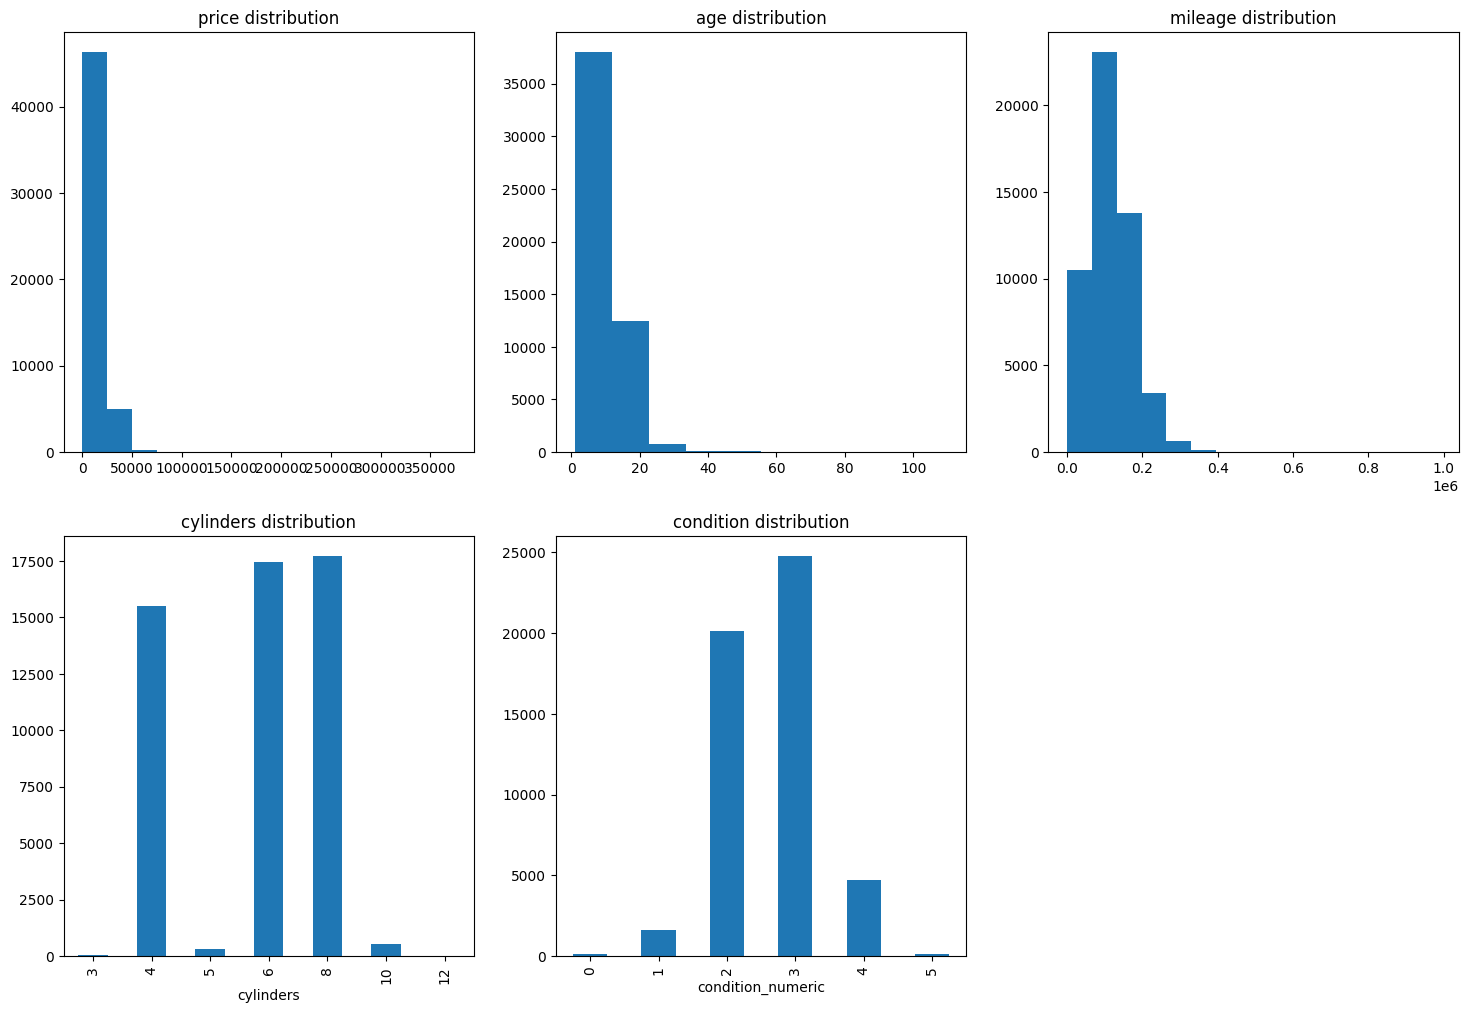

In [41]:
# Plotting data with outliers
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
price = data['price']
plt.title('price distribution')
plt.hist(price, bins=15)

plt.subplot(2, 3, 2)
age = data.loc[data['age'] < 1908, 'age']
plt.title('age distribution')
plt.hist(age, bins=10)

plt.subplot(2, 3, 3)
odometer = data.loc[data['odometer'] > -1, 'odometer']
plt.title('mileage distribution')
plt.hist(odometer, bins=15)

plt.subplot(2, 3, 4)
cylinders = data.loc[data['cylinders'] > 0].value_counts('cylinders').sort_index()
plt.title('cylinders distribution')
cylinders.plot(kind='bar')

plt.subplot(2, 3, 5)
condition = data.value_counts('condition_numeric', sort=False)
plt.title('condition distribution')
condition.plot.bar()

plt.show()

Little can be discerned from the first 3 plots due to the large number of outliers present. Outliers will be filtered before continuing.

## Examining and handling outliers

The empty space in the charts above indicate the presence of outliers in the data. To better visualize the data, the outliers in the numerical columns `price`, `odometer`, `age`, `mean_annual_mileage` need to be excluded first.

Reviewing `price` also shows that the impossibly low values exist and distort the data. As mentioned in the previous sections, these impossible values will be counted as outliers and excluded from further analyses.

In [42]:
# Creating a function to define bounds
def define_bound(data, bound, set_lower_to_zero=True):
    """
    This function takes the data input and calculates its bounds
        using its 1st & 3rd quartiles (Q1 & Q3) and interquartile range (IQR).
    If `bound` is set to 'lower',
        the function will return its lower bound,
        with an option to return zero instead if `set_lower_to_zero` is set to `False`. 
    If `bound` is set to 'upper',
        the function will return its upper bound.
    """
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1- (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    if bound == 'lower':
        if set_lower_to_zero == False:
            return lower_bound
        if set_lower_to_zero == True:
            if lower_bound < 0:
                return 0
            else:
                return lower_bound
    if bound == 'upper':
        return upper_bound

In [43]:
# Defining lower bounds without excluded placeholder values
price_lower = data['price'].quantile(0.25)
# since `price`'s lower bound still permits impossible values,
# it will be replaced by its 1st quartile instead.

odometer_lower = define_bound((data.loc[data['odometer'] > -1, 'odometer']), 'lower')

age_lower = define_bound((data.loc[data['age'] < 1908, 'age']), 'lower')

mean_mileage_lower = define_bound((data.loc[data['mean_annual_mileage'] > -1, 'mean_annual_mileage']), 'lower')

In [44]:
# Defining upper bounds without excluded placeholder values
price_upper = define_bound(data['price'], 'upper')

odometer_upper = define_bound((data.loc[data['odometer'] > -1, 'odometer']), 'upper')

age_upper = define_bound((data.loc[data['age'] < 1908, 'age']), 'upper')

mean_mileage_upper = define_bound((data.loc[data['mean_annual_mileage'] > -1, 'mean_annual_mileage']), 'upper')

In [45]:
# Defining data slicing rules:
# excluding outliers and placeholder values
price_conditions = '(price > @price_lower) & (price < @price_upper)'
odometer_conditions = '(odometer > @odometer_lower) & (odometer < @odometer_upper) & (model != "mercedes-benz benze sprinter 2500")'
age_conditions = '(age >= @age_lower) & (age < @age_upper)'
mean_mileage_conditions = '(mean_annual_mileage > @mean_mileage_lower) & (mean_annual_mileage < @mean_mileage_upper)'

In [46]:
# Simpan data tanpa outlier dalam DataFrame yang terpisah
sans_outliers = data.query(price_conditions)
sans_outliers = sans_outliers.query(odometer_conditions)
sans_outliers = sans_outliers.query(age_conditions)
sans_outliers = sans_outliers.query(mean_mileage_conditions)

# Checking the new dataset
sans_outliers

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_numeric,weekday,month,year,age,mean_annual_mileage
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,suv,unknown,True,2018-06-23,19,2,Saturday,June,2018,7,20714.285714
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2,Friday,October,2018,7,12672.142857
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,4,Thursday,February,2019,6,18333.333333
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,3,Wednesday,June,2018,4,14488.500000
6,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,3,Thursday,December,2018,3,26404.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51516,8999,2011,jeep grand cherokee,good,6,gas,122390.0,automatic,suv,white,True,2018-11-01,51,2,Thursday,November,2018,7,17484.285714
51517,11000,2012,dodge charger,excellent,8,gas,81000.0,automatic,sedan,black,False,2019-04-19,44,3,Friday,April,2019,7,11571.428571
51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,4,Wednesday,October,2018,5,17627.200000
51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,2,Monday,July,2018,5,27914.600000


In [47]:
# Checking the outliers in `price`
print('Before filtering:')
print(data['price'].describe())
print()
print('After filtering:')
sans_outliers['price'].describe()

Before filtering:
count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

After filtering:


count    32753.000000
mean     13650.393094
std       7053.444615
min       5065.000000
25%       7910.000000
50%      11900.000000
75%      17995.000000
max      34595.000000
Name: price, dtype: float64

## Examining core parameters without outliers

Filtering the outliers resulted in less distorted data at the cost of excluding approximately half (~25000 rows) of the values.
We will study the cleaned core parameters once more and compare it with the previous version.

In [48]:
# Comparing the statistics of the old and new version
core_parameters = ['price', 'age', 'odometer', 'cylinders', 'condition_numeric']
series_list = []

for parameter in core_parameters:
    series = data[parameter].describe()
    series_list.append(series)

print('Data with outliers:')
pd.DataFrame(data=series_list).transpose()

print()

series_list = []
for parameter in core_parameters:
    series = sans_outliers[parameter].describe()
    series_list.append(series)
    
print('Data without outliers:')
pd.DataFrame(data=series_list).transpose()

Data with outliers:

Data without outliers:


,price,age,odometer,cylinders,condition_numeric
count,32753.000000,32753.000000,32753.000000,32753.000000,32753.000000
mean,13650.393094,7.435258,105036.969453,6.214057,2.711782
std,7053.444615,4.152683,49683.097880,1.626432,0.651021
min,5065.000000,1.000000,1.000000,3.000000,0.000000
25%,7910.000000,4.000000,71070.000000,4.000000,2.000000
50%,11900.000000,7.000000,106000.000000,6.000000,3.000000
75%,17995.000000,10.000000,135908.000000,8.000000,3.000000
max,34595.000000,23.000000,255000.000000,12.000000,5.000000


Data with outliers:


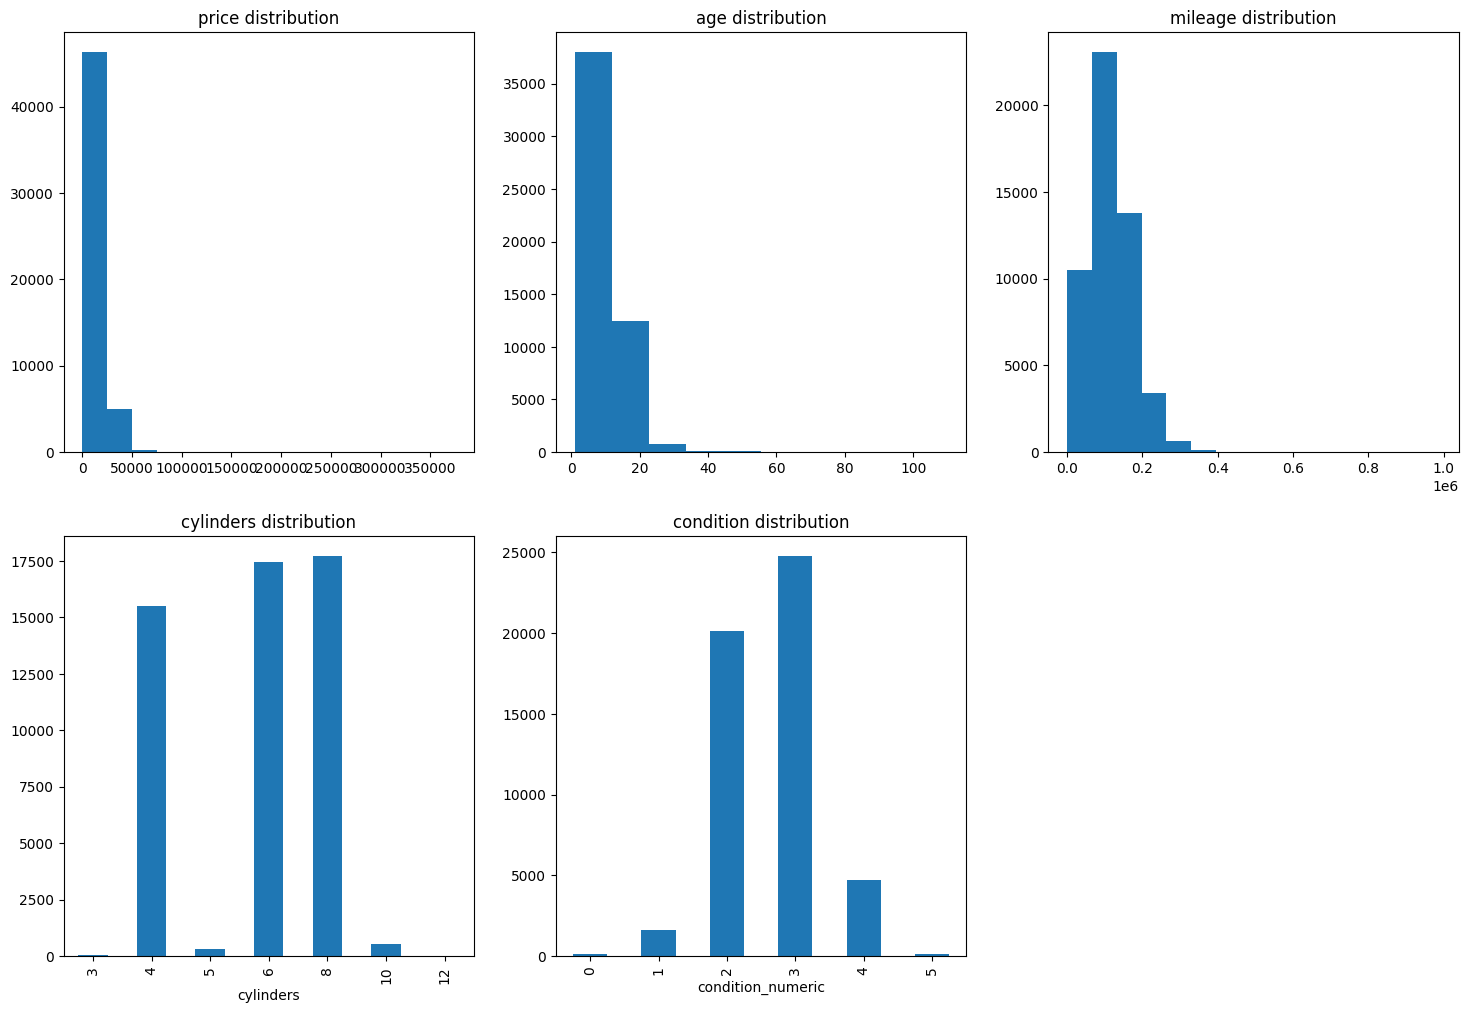

Data without outliers:


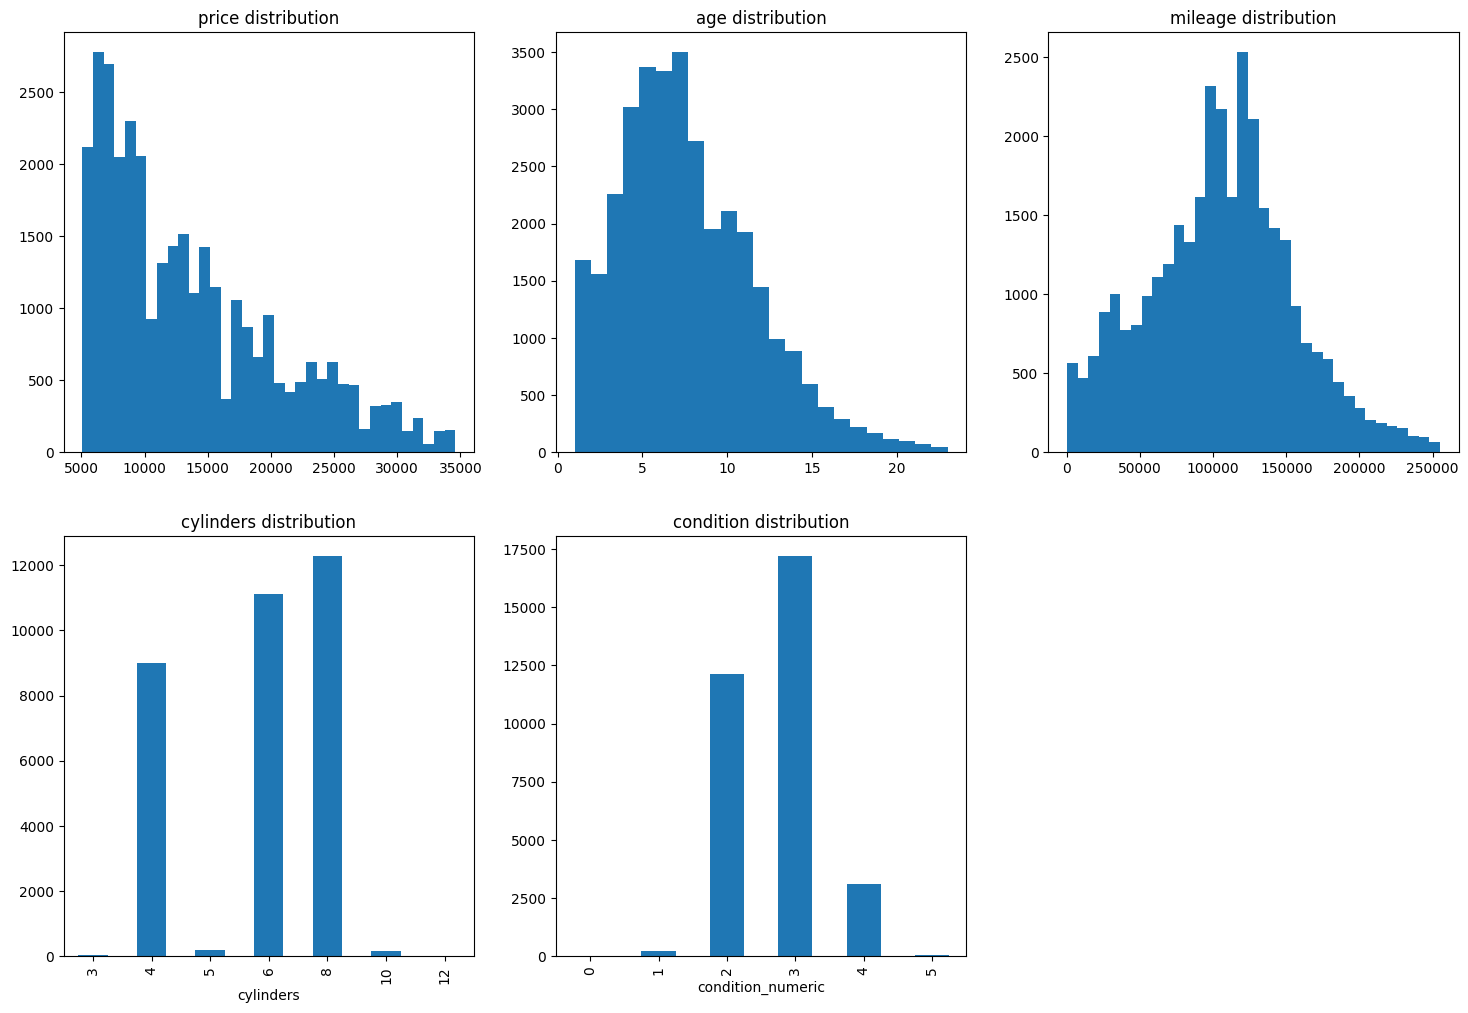

In [49]:
# Plotting data with outliers
print('Data with outliers:')
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
price = data['price']
plt.title('price distribution')
plt.hist(price, bins=15)

plt.subplot(2, 3, 2)
age = data.loc[data['age'] < 1908, 'age']
plt.title('age distribution')
plt.hist(age, bins=10)

plt.subplot(2, 3, 3)
odometer = data.loc[data['odometer'] > -1, 'odometer']
plt.title('mileage distribution')
plt.hist(odometer, bins=15)

plt.subplot(2, 3, 4)
cylinders = data.loc[data['cylinders'] > 0].value_counts('cylinders').sort_index()
plt.title('cylinders distribution')
cylinders.plot(kind='bar')

plt.subplot(2, 3, 5)
condition = data.value_counts('condition_numeric', sort=False)
plt.title('condition distribution')
condition.plot.bar()

plt.show()


# Plotting data without outliers
print('Data without outliers:')
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
price = sans_outliers['price']
plt.title('price distribution')
plt.hist(price, bins=35)

plt.subplot(2, 3, 2)
age = sans_outliers.loc[sans_outliers['age'] < 1908, 'age']
plt.title('age distribution')
plt.hist(age, bins=23)

plt.subplot(2, 3, 3)
odometer = sans_outliers.loc[sans_outliers['odometer'] > -1, 'odometer']
plt.title('mileage distribution')
plt.hist(odometer, bins=35)

plt.subplot(2, 3, 4)
cylinders = sans_outliers.loc[sans_outliers['cylinders'] > 0].value_counts('cylinders').sort_index()
plt.title('cylinders distribution')
cylinders.plot(kind='bar')

plt.subplot(2, 3, 5)
condition = sans_outliers.value_counts('condition_numeric', sort=False)
plt.title('condition distribution')
condition.plot.bar()

plt.show()

With the outliers and impossible values excluded, the plots are now more readable, as seen in the comparison above.

Findings:
1. `price`, `age`, and `odometer` data are skewed right, indicating the lower occurence of higher values.
1. The most common `price` is at around `8000`, This happens to be near the 1st quantile (`7995`) but deviates far from the mean and median of ~12000. The values fall sharply afterwards with occasional increases near every multiples of 5000 after 10000.
1. The mode and median values of `age` are the same at `6` years.
1. The mean and median values of the cars' mileage (`odometer`) rest at around `103000`.
1. The median (and mean) number of `cylinders` is `6`, while the most common numbers are `4`, `6`, and `8`.
1. `3`, the numerical code for the `excellent` `condition`, is the median value.


Insights:
1. Half of all cars are cheaper than `13000`, and 3/4 of them were sold below the 20000 price mark.
1. Half of the cars were below 6 years old at the time of advertisement.
1. Most (75%) of the vehicles had not traveled more than `140000` in distance.
1. 98% of the cars have either  `4`, `6`, or `8` cylinders in their engines.
1. 75% of the vehicles were at least in `good` condition and 50% were at least in `excellent` shape.

## Masa Berlaku Iklan 
Next, we will see the data airtime as specified in `days_listed`.

Upper bound: 104.0


count    32753.000000
mean        39.526517
std         28.284560
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

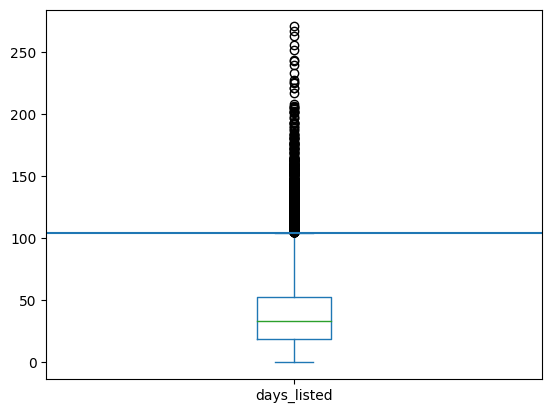

In [50]:
sans_outliers['days_listed'].plot(kind='box')
days_listed_upper = define_bound(sans_outliers['days_listed'], 'upper') 
plt.axhline(y=days_listed_upper)

print('Upper bound: ' + str(days_listed_upper))
sans_outliers['days_listed'].describe()

0.9682777150184716


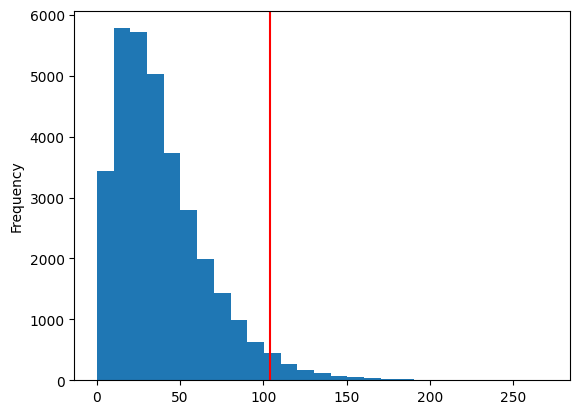

In [51]:
sans_outliers['days_listed'].plot(kind='hist', bins=27)
plt.axvline(x=days_listed_upper, color='red')

print(len(sans_outliers.query('days_listed <= @days_listed_upper')) / len(sans_outliers))

Findings:
- 50% of ads were taken down within 33 days.
- 97% of ads aired for 106 days (the upper bound) before being taken down.

Insights:
- The airtime of 33 days indicated that 50% of cars got sold within that time period after the ad was posted.
- Most (97%) of the cars found a buyer within 106 days of the ad's posting.

## Average vehicle price by type

To know the popularity of certain car models, we will examine the distribution of car prices and the number of ads per vehicle model.

In [52]:
# Aggregating the mean price of all vehicle types
mean_price_per_type = (sans_outliers.pivot_table(index='type', values='price', aggfunc='mean')
                        .sort_values(by='price', ascending=False))
mean_price_per_type

,price
type,
bus,22205.062500
coupe,17174.655944
pickup,16875.047551
truck,16475.113605
convertible,15311.452830
offroad,15247.386076
suv,12588.357853
other,12033.943038
wagon,10852.306785


In [53]:
# Counting the number of ads per vehicle type
ads_per_type = (sans_outliers.pivot_table(index='type', values='transmission', aggfunc='count')
    .sort_values(by='transmission', ascending=False))
ads_per_type = ads_per_type.rename(columns={'transmission': 'ad_count'})
ads_per_type

,ad_count
type,
truck,8732
suv,8143
sedan,6400
pickup,4900
coupe,1430
wagon,1017
mini-van,625
hatchback,549
van,360


## Pricing factors

To determine the factors that affect `price`, we will take the models `ford f-150` and `chevrolet silverado 1500` as samples, owing to their being the largest population in the data. We'll see how their specifications impact their prices. Median (not mean) of prices per specification category will be used due to the considerable deviation.

In [54]:
# Tabulating the specified data
query = 'type == "sedan" | type == "suv"'
factors = ['type', 'price', 'age', 'odometer', 'condition_numeric', 'transmission', 'paint_color']
factors_table = sans_outliers.query(query)[factors]

In [57]:
# Tabulating mean price per categorical factor
condition_price = factors_table.pivot_table(index=['condition_numeric', 'type'], values='price', aggfunc='median').reset_index()

transmission_price = factors_table.pivot_table(index=['type', 'transmission'], values='price', aggfunc='median').reset_index()

color_price = factors_table.pivot_table(index=['type', 'paint_color'], values='price', aggfunc='median').reset_index()

In [58]:
condition_price

,condition_numeric,type,price
0,0,sedan,9450
1,0,suv,14100
2,1,sedan,6500
3,1,suv,6500
4,2,sedan,7145
5,2,suv,9271
6,3,sedan,8420
7,3,suv,11450
8,4,sedan,9495
9,4,suv,14900


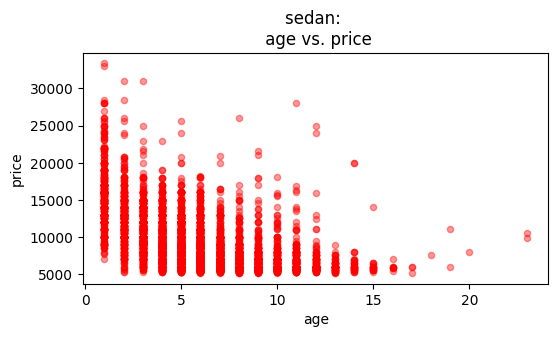

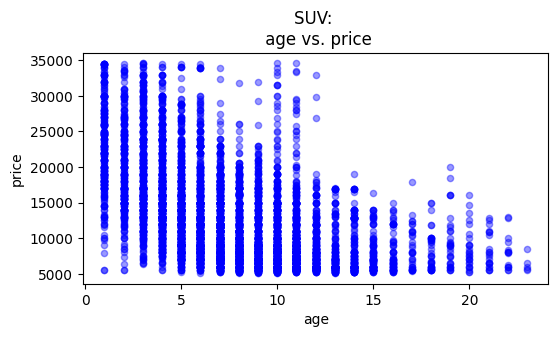

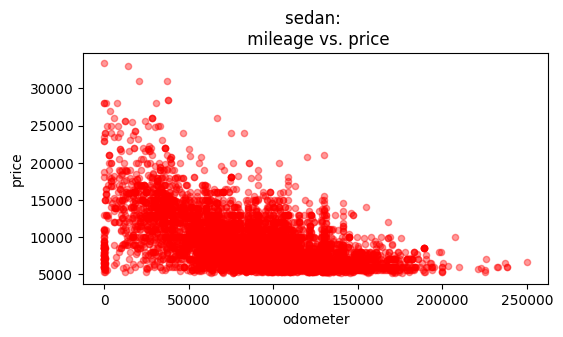

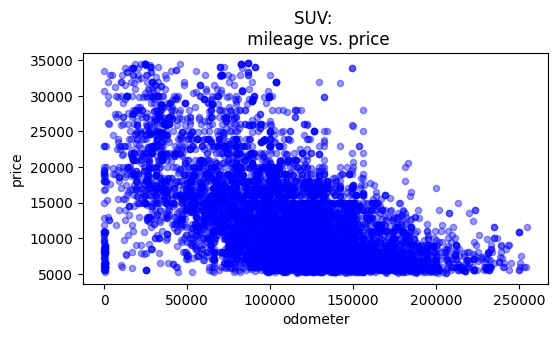

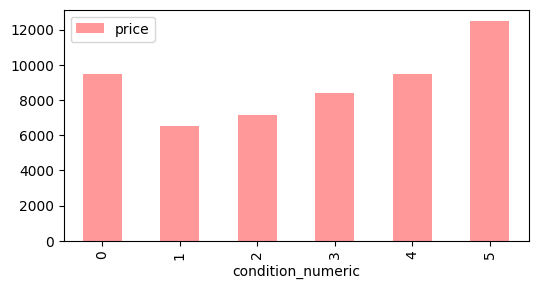

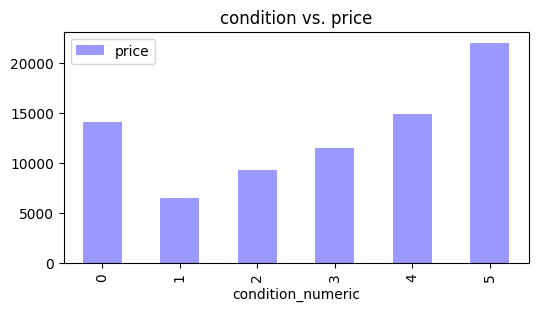

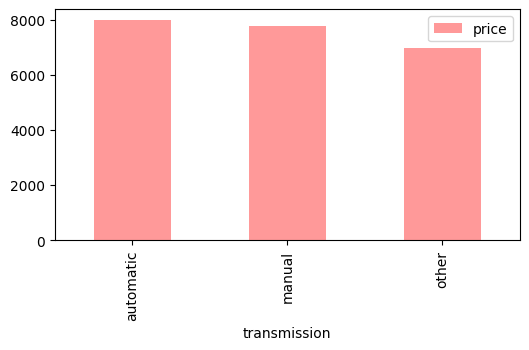

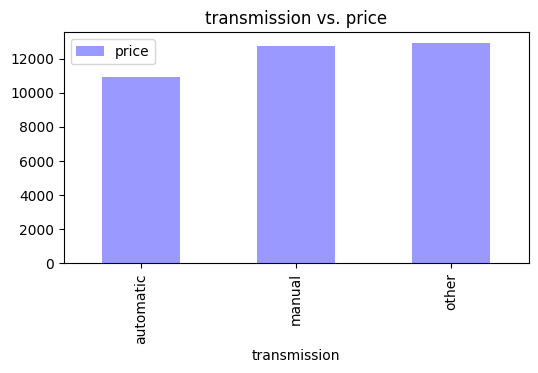

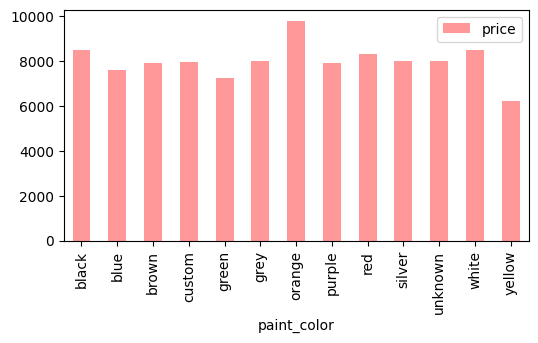

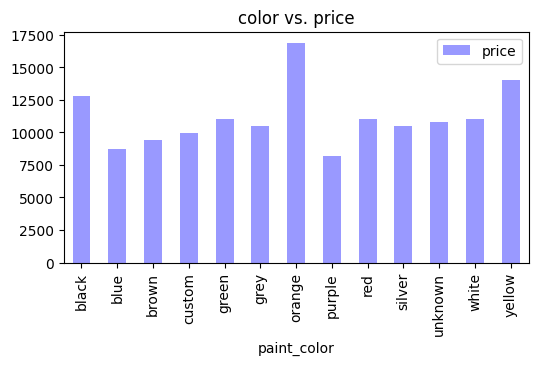

In [59]:
# Plotting the values

# Age vs. price
factors_table.query('type == "sedan"').plot(kind='scatter', x='age', y='price', alpha=0.4, color='red', figsize=(6, 3))
plt.title('sedan: \n age vs. price')

factors_table.query('type == "suv"').plot(kind='scatter', x='age', y='price', alpha=0.4, color='blue', figsize=(6, 3))
plt.title('SUV: \n age vs. price')

# Mileage vs. price
factors_table.query('type == "sedan"').plot(kind='scatter', x='odometer', y='price', alpha=0.4, color='red', figsize=(6, 3))
plt.title('sedan: \n mileage vs. price')

factors_table.query('type == "suv"').plot(kind='scatter', x='odometer', y='price', alpha=0.4, color='blue', figsize=(6, 3))
plt.title('SUV: \n mileage vs. price')

# Condition vs. price
condition_price.query('type == "sedan"').plot(kind='bar', x='condition_numeric', y='price', alpha=0.4, color='red', figsize=(6, 3))
condition_price.query('type == "suv"').plot(kind='bar', x='condition_numeric', y='price', alpha=0.4, color='blue', figsize=(6, 3))
plt.title('condition vs. price')

# Transmission vs. price
transmission_price.query('type == "sedan"').plot(kind='bar', x='transmission', y='price', alpha=0.4, color='red', figsize=(6, 3))
transmission_price.query('type == "suv"').plot(kind='bar', x='transmission', y='price', alpha=0.4, color='blue', figsize=(6, 3))
plt.title('transmission vs. price')

# Color vs. price
color_price.query('type == "sedan"').plot(kind='bar', x='paint_color', y='price', alpha=0.4, color='red', figsize=(6, 3))
color_price.query('type == "suv"').plot(kind='bar', x='paint_color', y='price', alpha=0.4, color='blue', figsize=(6, 3))
plt.title('color vs. price')

plt.show()

Alternatively, visualizing with scatter matrices:

sedan scatter matrix:


array([[<AxesSubplot: xlabel='price', ylabel='price'>,
        <AxesSubplot: xlabel='age', ylabel='price'>,
        <AxesSubplot: xlabel='odometer', ylabel='price'>,
        <AxesSubplot: xlabel='condition_numeric', ylabel='price'>],
       [<AxesSubplot: xlabel='price', ylabel='age'>,
        <AxesSubplot: xlabel='age', ylabel='age'>,
        <AxesSubplot: xlabel='odometer', ylabel='age'>,
        <AxesSubplot: xlabel='condition_numeric', ylabel='age'>],
       [<AxesSubplot: xlabel='price', ylabel='odometer'>,
        <AxesSubplot: xlabel='age', ylabel='odometer'>,
        <AxesSubplot: xlabel='odometer', ylabel='odometer'>,
        <AxesSubplot: xlabel='condition_numeric', ylabel='odometer'>],
       [<AxesSubplot: xlabel='price', ylabel='condition_numeric'>,
        <AxesSubplot: xlabel='age', ylabel='condition_numeric'>,
        <AxesSubplot: xlabel='odometer', ylabel='condition_numeric'>,
        <AxesSubplot: xlabel='condition_numeric', ylabel='condition_numeric'>]],
      dtype

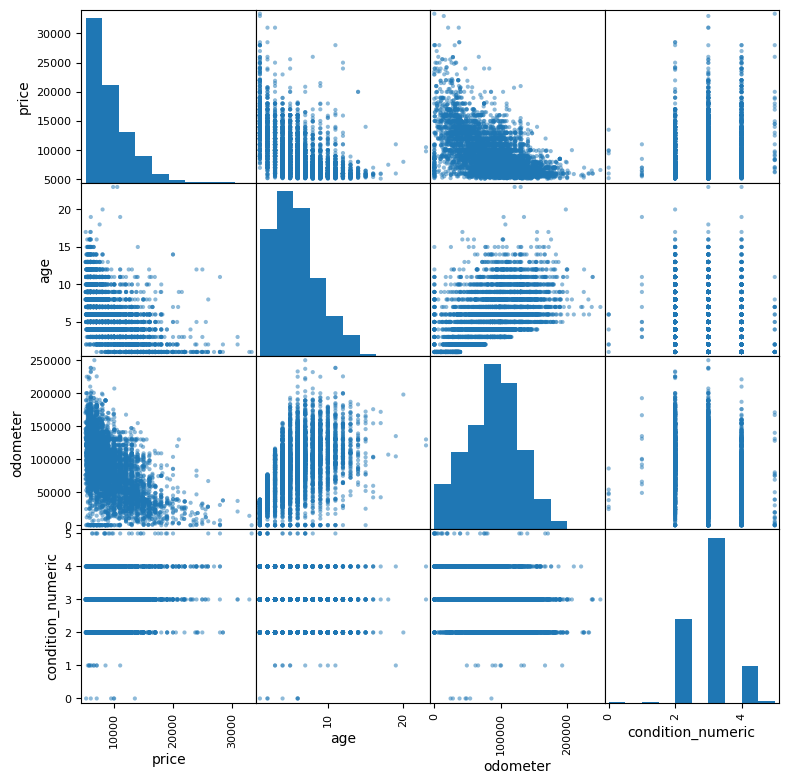

In [60]:
# Plotting numeric values in a scatter matrix

# sedan
print('sedan scatter matrix:')
pd.plotting.scatter_matrix(factors_table.query('type == "sedan"'), figsize=(9, 9))

SUV scatter matrix:


array([[<AxesSubplot: xlabel='price', ylabel='price'>,
        <AxesSubplot: xlabel='age', ylabel='price'>,
        <AxesSubplot: xlabel='odometer', ylabel='price'>,
        <AxesSubplot: xlabel='condition_numeric', ylabel='price'>],
       [<AxesSubplot: xlabel='price', ylabel='age'>,
        <AxesSubplot: xlabel='age', ylabel='age'>,
        <AxesSubplot: xlabel='odometer', ylabel='age'>,
        <AxesSubplot: xlabel='condition_numeric', ylabel='age'>],
       [<AxesSubplot: xlabel='price', ylabel='odometer'>,
        <AxesSubplot: xlabel='age', ylabel='odometer'>,
        <AxesSubplot: xlabel='odometer', ylabel='odometer'>,
        <AxesSubplot: xlabel='condition_numeric', ylabel='odometer'>],
       [<AxesSubplot: xlabel='price', ylabel='condition_numeric'>,
        <AxesSubplot: xlabel='age', ylabel='condition_numeric'>,
        <AxesSubplot: xlabel='odometer', ylabel='condition_numeric'>,
        <AxesSubplot: xlabel='condition_numeric', ylabel='condition_numeric'>]],
      dtype

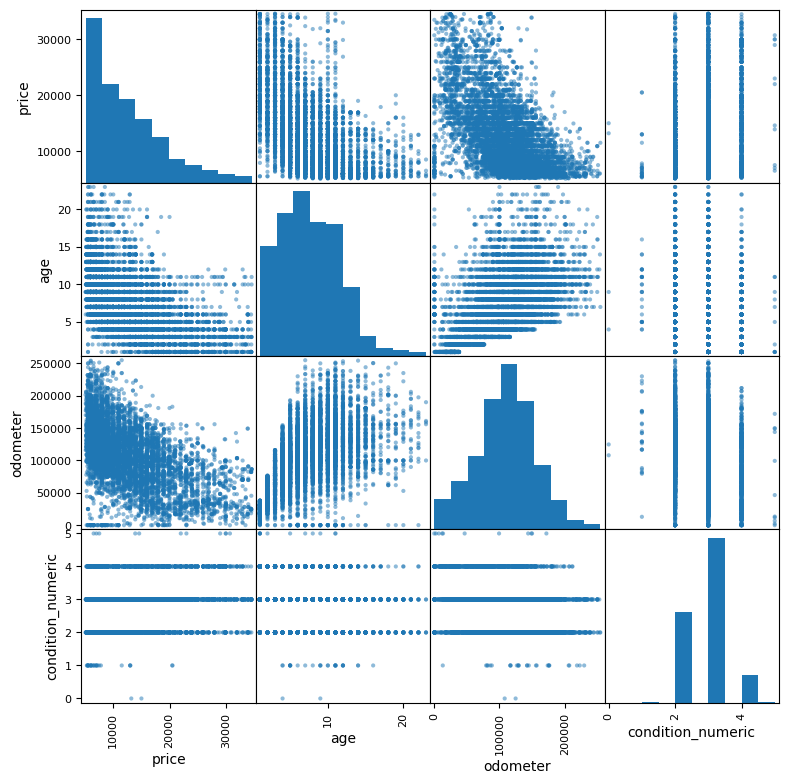

In [61]:
# SUV
print('SUV scatter matrix:')
pd.plotting.scatter_matrix(factors_table.query('type == "suv"'), figsize=(9, 9))

While the correlation between the factors and price is evident from the scatter matrices, we can further prove it in exact numbers:

In [62]:
print('sedan: ')
factors_table.query('type == "sedan"').corr()

sedan: 


C:\Users\Stanislaus Joshua\AppData\Local\Temp\ipykernel_10808\3799938268.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  factors_table.query('type == "sedan"').corr()


,price,age,odometer,condition_numeric
price,1.000000,-0.535587,-0.560442,0.215400
age,-0.535587,1.000000,0.520276,-0.147211
odometer,-0.560442,0.520276,1.000000,-0.239725
condition_numeric,0.215400,-0.147211,-0.239725,1.000000


In [63]:
print('SUV: ')
factors_table.query('type == "suv"').corr()

SUV: 


C:\Users\Stanislaus Joshua\AppData\Local\Temp\ipykernel_10808\3651414336.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  factors_table.query('type == "suv"').corr()


,price,age,odometer,condition_numeric
price,1.000000,-0.539856,-0.551000,0.199384
age,-0.539856,1.000000,0.525505,-0.149204
odometer,-0.551000,0.525505,1.000000,-0.218354
condition_numeric,0.199384,-0.149204,-0.218354,1.000000


In [64]:
factors_table.corr()

C:\Users\Stanislaus Joshua\AppData\Local\Temp\ipykernel_10808\3604986717.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  factors_table.corr()


,price,age,odometer,condition_numeric
price,1.000000,-0.414025,-0.431639,0.169498
age,-0.414025,1.000000,0.549962,-0.155188
odometer,-0.431639,0.549962,1.000000,-0.232476
condition_numeric,0.169498,-0.155188,-0.232476,1.000000


Findings:
- `age` and `odometer` has a negative correlation with `price`.
- `condition` is very weakly correlated with `price`, as shown by the low positive coefficient value.
- The following transmission types, in order, are the most expensive in sedans: `automatic`, `manual`, `other`; while in SUVs, it's the other way around.
- `black` and `orange` paint colors hold the highest median vehicle price.

Insights:
- Increase in `age` is related to a vehicle's price decrease.
- High mileage in a vehicle's `odometer` corresponds to a decrease in its value.
- Sometimes, vehicles in better condition fetch better prices.
- Transmission system can affect a vehicle's price. However, this relies on the type of the vehicle in question.
- Cars painted in `black` and `orange` have the highest price.

## Conclusion

### Data preprocessing

This project started with a dataset containing 51,525 entries across 13 columns.

There were 4 implicit duplicates in `model`, which have been merged:
1. `ford f150` and `ford f-150` were merged as `model` `ford f-150`,
1. `ford f250` and `ford f-250` were merged as `model` `ford f-250`.

41 entries of model `mercedes-benz benze sprinter 2500` were suspected to be duplicates. Because we couldn't fill the important variable, `odometer`, these entries were excluded from analyses.

Some columns with missing values were handled as such:
1. `model_year`, `odometer`, and `cylinders` were filled using the model median,
1. `is_4wd` were filled by  the boolean `0` (False),
1. `paint_color` were filled with `unknown`.

These values were thought to be missing due to the seller not knowing their vehicles' specifications. This can be prevented by making these information a requirement when putting up a listing.

Several columns had their data types changed:
- `model_year`, `cylinders` (`float64` to `int64`),
- `date_posted` (`object` to `datetime`).
- `is_4wd` (`float64` to `bool`). 

To improve data quality, the following columns were added to the dataset:
1. `weekday`,
1. `month`,
1. `year` from `date_posted`;
1. `age`, calculated by subtracting `model_year` from `date_posted`,
1. `mean_annual_mileage`, calculated by dividing `odometer` by `age`.

The complete data were filtered to exclude outliers, missing & impossible values. This process resulted in a new dataset with only 32,753 entries (around 63% of the original data), removing 18,772 entries. Outliers were determined by the upper and lower bounds, which were calculated using the first and third quartiles of the data.

The following columns served as filters since they contained outliers, missing or impossible values:
1. `price`
1. `odometer`
1. `age`
1. `mean_mileage_conditions`

### Summary of insights

1. Price
    1. Half of all cars are cheaper than `13000`, and 3/4 of them were sold below the 20000 price mark.
    1. Half of the cars were below 6 years old at the time of advertisement.
    1. Increase in `age` is related to a vehicle's price decrease.
    1. High mileage in a vehicle's `odometer` corresponds to a decrease in its value.
    1. Sometimes, vehicles in better condition fetch better prices..
    1. Transmission system can affect a vehicle's price. However, this relies on the type of the vehicle in question.
    1. Cars painted in `black` and `orange` have the highest price.
1. Mileage
    1. Most (75%) of the vehicles had not traveled more than `140000` in distance.
1. Number of cylinders
    1. 98% of the cars have either  `4`, `6`, or `8` cylinders in their engines.
1. Condition
    1. 75% of the vehicles were at least in `good` condition and 50% were at least in `excellent` shape.
1. Listing airtime
    1. Listings' median airtime of 33 days indicated that 50% of cars got sold within that time period after the ad was posted.
    1. Most (97%) of the cars found a buyer within 106 days of the ad's posting.